In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [ ]:
data['STATE'] = data['STATE'].astype('category')
data['STATE'] = data['STATE'].cat.codes.astype(int)

In [ ]:
data['COUNTY_STATE'] = data['COUNTY_STATE'].astype('category')
data['COUNTY_STATE'] = data['COUNTY_STATE'].cat.codes.astype(int)

In [ ]:
data.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [ ]:
# Old stuff from my jupyter lab - coded it out so I don't run it and kill the kernel!

# shuffled = data.sample(frac=1)
# result = np.array_split(shuffled, 50)

In [ ]:
# pca_data = result[1]

In [ ]:
# pca_data.shape

(33647, 42)

In [ ]:
# pca_data = pca_data.drop('NWCG_GENERAL_CAUSE', axis=1)

# pca = PCA(n_components=4)
# pca_components = pca.fit_transform(pca_data)

In [ ]:
# pca.explained_variance_ratio_

array([9.21654861e-01, 5.15548157e-02, 2.62316393e-02, 5.33845014e-04])

In [ ]:
# pca_dataframe = pd.DataFrame(pca_components, columns=["PC1", "PC2", "PC3", "PC4"])

<Axes: xlabel='PC1', ylabel='PC2'>

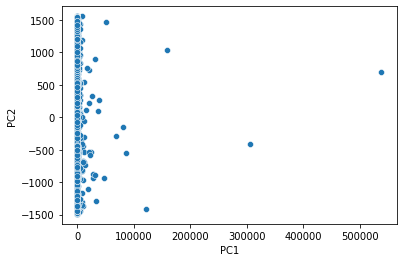

In [ ]:
# import seaborn as sns

# sns.scatterplot(
#     data = pca_dataframe,
#     x = "PC1",
#     y = "PC2"
# )

In [ ]:
# pca_dataframe.shape

(33647, 4)

In [ ]:
# import scipy
# from scipy.cluster import hierarchy
# from scipy.cluster.hierarchy import dendrogram
# from matplotlib import pyplot as plt


In [ ]:
## Step 1: Use PC1 and PC2 for hierarchical clustering.
# clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="ward")

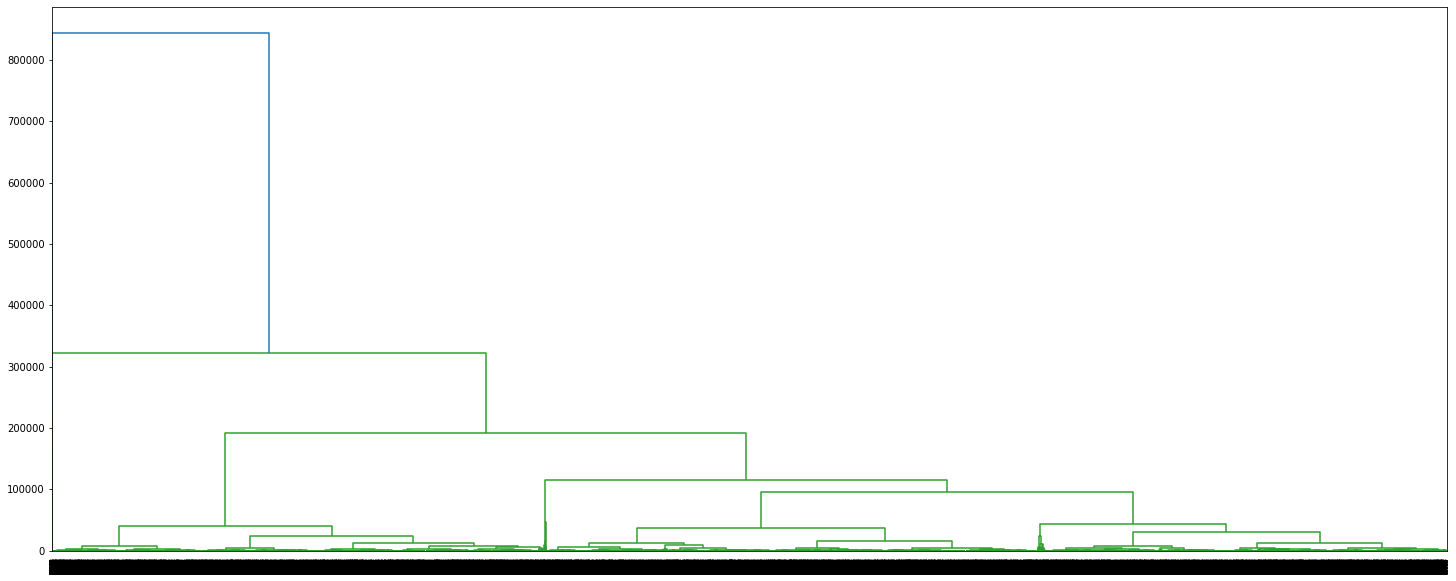

In [ ]:
## Step 2: Show the dendrogram.
# fig = plt.figure(figsize=(25, 10))
# dn = dendrogram(clusters)
# plt.show()

In [ ]:
## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.
# from sklearn.cluster import AgglomerativeClustering

# clustering = AgglomerativeClustering(n_clusters=5)
# Y_preds = clustering.fit_predict(pca_dataframe[["PC1", "PC2"]])

# pca_dataframe["predicted_hierarchical_cluster"] = Y_preds

<Axes: xlabel='PC1', ylabel='PC2'>

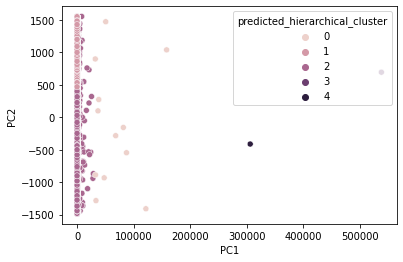

In [ ]:
## Step 4: Plot the hierarchical clustering results. Do they make sense?
# sns.scatterplot(
#     data = pca_dataframe,
#     x = "PC1",
#     y = "PC2",
#     hue = "predicted_hierarchical_cluster"
# )

# K-Means Clustering instead

Will try K-Means using data as original, then try again with columns removed and 'other' combined with 'undetermined'

In [ ]:
kmean_data = data

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean_data['NWCG_GENERAL_CAUSE'].value_counts() #13 "clusters" currently

Undetermined                           453517
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Other causes                             8149
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
X = kmean_data.drop("NWCG_GENERAL_CAUSE", axis=1)
Y = kmean_data["NWCG_GENERAL_CAUSE"]

In [ ]:
Kmean = KMeans(n_clusters=13)
Kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13)

In [ ]:
# for actual_class, clustered_class in zip(Y, Kmean.labels_):
#     print(actual_class, clustered_class)

In [ ]:
kmean_data['kmean'] = Kmean.labels_

In [ ]:
kmean_data['kmean'].value_counts()

3     486791
7     441893
0     429969
4     160508
11    159121
10      2816
8        738
2        290
6        106
1         62
12        27
9         13
5          7
Name: kmean, dtype: int64

In [ ]:
kmean_data[kmean_data['kmean']==12].head(20)

,FIRE_YEAR,NWCG_GENERAL_CAUSE,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,...,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL,kmean
24752,2007,Equipment and vehicle use,240207.0,60.0,3,0.00,24.06,3.49,150,2,...,0,0,0,0,0,1,0,0,0,12
80924,2003,Recreation and ceremony,280059.0,10.0,3,0.00,23.33,3.00,704,5,...,0,0,1,0,0,0,0,0,0,12
140404,2002,Arson,259158.9,0.0,2,0.00,27.51,3.62,920,1,...,0,0,0,0,0,0,0,0,0,12
170629,2006,Natural,220042.1,26.0,10,0.20,24.80,3.77,1301,1,...,0,0,0,0,0,0,0,0,0,12
175515,2006,Natural,238462.6,9.0,30,0.22,29.52,2.39,1259,1,...,0,0,0,0,0,0,0,0,0,12
177195,2005,Natural,238058.0,13.0,30,2.18,24.16,4.89,1515,2,...,0,0,0,0,0,0,0,0,0,12
451348,2008,Undetermined,220000.0,4.0,40,0.00,17.47,9.02,731,0,...,0,0,0,0,0,0,1,0,0,12
618078,2005,Natural,248310.0,20.0,2,0.01,37.08,2.19,308,1,...,0,0,1,0,0,0,0,0,0,12
719722,2010,Natural,306113.0,12.0,10,0.02,23.76,5.04,1686,5,...,0,0,0,0,0,0,0,0,0,12
878322,2011,Undetermined,222954.0,48.0,29,0.00,21.00,6.20,1472,6,...,0,0,1,0,0,0,0,0,0,12


In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt

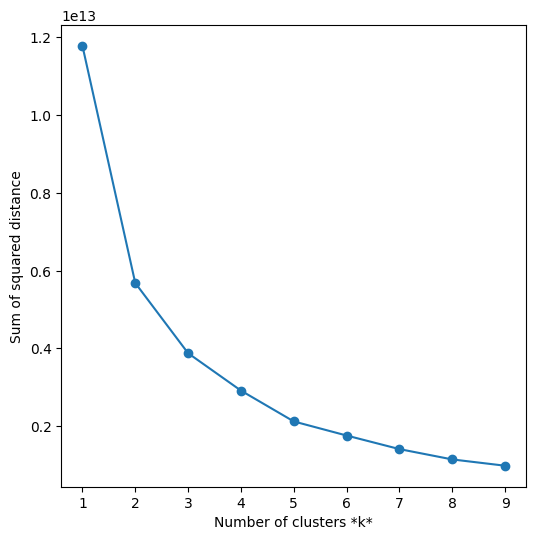

In [ ]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Everywhere seems to suggest that the data should be normalised first so I am going to do this and see...

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmean_normalised = scaler.fit_transform(X)

In [ ]:
#Running the shoulder-plot again
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(kmean_normalised)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

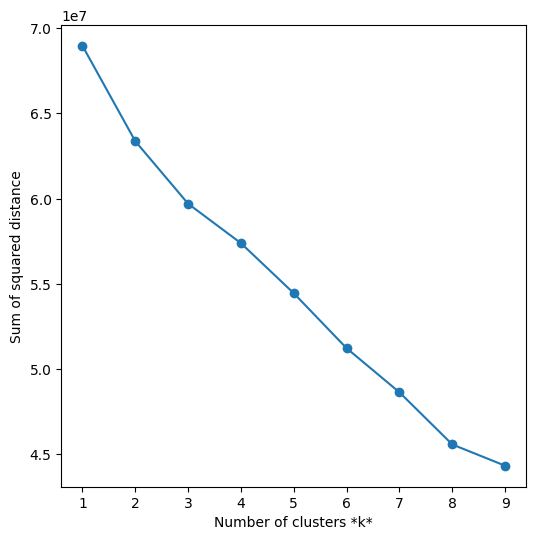

In [ ]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

I will try the shoulder-plot again with the edits suggested by the logistic regression, and then try some PCA on the normalised dataset.

In [ ]:
# Dropping categories as determined by the logistic regression
cause_drop = ['NWCG_CAUSE_CLASSIFICATION = _Human', 'NWCG_CAUSE_CLASSIFICATION = _Natural', 'NWCG_CAUSE_CLASSIFICATION = _undetermined']
age_drop = ['NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural','NWCG_CAUSE_AGE_CATEGORY = _Minor']

kmean_2_data = data.drop(cause_drop, axis=1)
kmean_2_data = kmean_2_data.drop(age_drop, axis=1)
kmean_2_data['NWCG_GENERAL_CAUSE'] = kmean_2_data['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined', 'Undetermined': 'Undetermined'})

In [ ]:
X2 = kmean_2_data.drop('NWCG_GENERAL_CAUSE', axis=1)
y2 = kmean_2_data['NWCG_GENERAL_CAUSE']

In [ ]:
kmean2_normalised = scaler.fit_transform(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

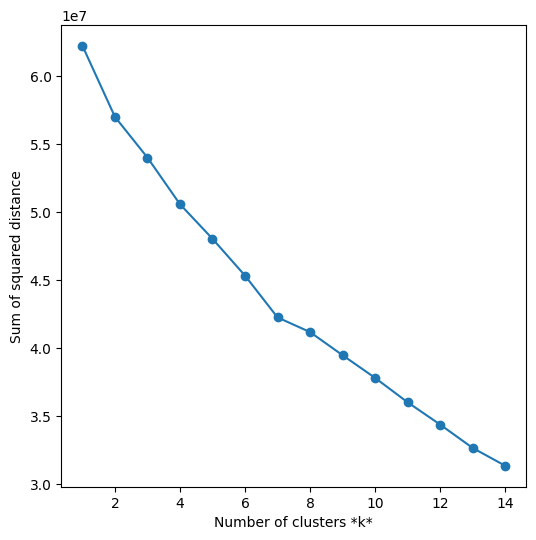

In [ ]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(kmean2_normalised)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
Kmean = KMeans(n_clusters=7)
Kmean.fit(kmean2_normalised)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
kmean_2_data['kmean'] = Kmean.labels_

In [ ]:
kmean_2_data['kmean'].value_counts()

2    800848
1    516264
0    157301
6    104688
5     82042
3     12314
4      8884
Name: kmean, dtype: int64

In [ ]:
kmean_2_data[kmean_2_data['kmean']==2].head(20)

,FIRE_YEAR,NWCG_GENERAL_CAUSE,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,...,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL,kmean
39,2005,Debris and open burning,125.00,1.0,24,0.00,2.98,3.15,393,5,...,0,0,0,0,0,1,0,0,0,2
41,2005,Debris and open burning,3.00,0.0,24,0.00,18.61,1.63,393,0,...,0,0,0,0,0,1,0,0,0,2
42,2005,Debris and open burning,10.00,0.0,24,0.00,18.61,1.63,393,0,...,0,0,0,0,0,1,0,0,0,2
88,2005,Fireworks,0.50,0.0,3,0.01,21.61,2.13,197,6,...,0,0,0,0,0,1,0,0,0,2
105,2005,Equipment and vehicle use,0.10,0.0,3,0.16,13.57,3.43,124,2,...,0,0,0,0,0,1,0,0,0,2
109,2005,Equipment and vehicle use,10.00,0.0,3,0.00,18.34,2.30,124,6,...,0,0,0,0,0,1,0,0,0,2
110,2005,Equipment and vehicle use,0.10,0.0,3,0.16,24.03,2.85,106,4,...,0,0,0,0,0,1,0,0,0,2
146,2005,Undetermined,0.10,0.0,3,0.00,13.73,3.18,407,0,...,0,0,0,0,0,1,0,0,0,2
154,2005,Debris and open burning,3.00,0.0,3,3.30,12.01,3.93,67,3,...,0,0,0,0,0,1,0,0,0,2
155,2005,Recreation and ceremony,0.10,0.0,3,3.14,9.81,2.48,393,0,...,0,0,0,0,0,1,0,0,0,2


In [ ]:
kmean_2_data[kmean_2_data['kmean']==1].head(20)

,FIRE_YEAR,NWCG_GENERAL_CAUSE,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,...,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL,kmean
90721,2000,Arson,15.0,0.0,33,0.00,30.66,1.89,175,1,...,0,0,0,0,0,0,1,0,0,1
90723,2000,Arson,2.0,0.0,33,0.04,29.85,2.60,339,5,...,0,0,0,0,0,0,1,0,0,1
90727,2000,Arson,6.0,0.0,33,0.00,32.30,2.50,339,4,...,0,0,0,0,0,0,1,0,0,1
90732,2000,Arson,100.0,0.0,1,0.00,32.16,2.78,243,0,...,0,0,0,0,0,0,1,0,0,1
90733,2000,Arson,4.0,0.0,33,0.00,32.75,1.85,175,1,...,0,0,0,0,0,0,1,0,0,1
90746,2000,Arson,1200.0,1.0,33,2.23,22.91,4.24,175,2,...,0,0,0,0,0,0,1,0,0,1
90747,2000,Arson,30.0,0.0,33,2.23,22.91,4.24,339,2,...,0,0,0,0,0,0,1,0,0,1
90905,2003,Arson,1.0,0.0,33,0.00,15.05,5.61,175,1,...,0,0,0,0,0,0,1,0,0,1
90906,2003,Arson,1.0,0.0,33,0.41,17.50,5.71,175,2,...,0,0,0,0,0,0,1,0,0,1
90924,2005,Debris and open burning,0.5,0.0,33,0.00,9.59,3.06,203,5,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
kmean_2_data[kmean_2_data['kmean']==0].head(20)

,FIRE_YEAR,NWCG_GENERAL_CAUSE,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,...,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL,kmean
0,2005,Power supply,0.10,0.0,3,0.01,0.49,3.76,1728,2,...,0,0,1,0,0,0,0,0,0,0
1,2004,Natural,0.25,0.0,3,0.00,13.36,2.62,1442,2,...,0,0,1,0,0,0,0,0,0,0
2,2004,Debris and open burning,0.10,0.0,3,0.41,19.16,1.80,903,0,...,0,0,0,0,0,1,0,0,0,0
3,2004,Natural,0.10,5.0,3,0.16,19.36,1.91,2630,0,...,0,0,1,0,0,0,0,0,0,0
4,2004,Natural,0.10,5.0,3,0.16,19.36,1.91,2630,0,...,0,0,1,0,0,0,0,0,0,0
5,2004,Natural,0.10,1.0,3,0.34,16.53,1.68,2630,2,...,0,0,1,0,0,0,0,0,0,0
6,2004,Natural,0.10,1.0,3,0.52,16.42,1.81,2630,3,...,0,0,1,0,0,0,0,0,0,0
7,2005,Debris and open burning,0.80,0.0,3,0.00,13.83,1.19,484,1,...,0,0,0,0,0,1,0,0,0,0
8,2005,Debris and open burning,1.00,0.0,3,0.00,6.85,1.02,825,1,...,0,0,0,0,0,1,0,0,0,0
9,2004,Natural,0.10,1.0,3,0.52,16.42,1.81,2630,3,...,0,0,1,0,0,0,0,0,0,0


# PCA 2 - Normalised Data

Okay trying out another PCA for good measure and to see if we can visualise it a bit better than the last one with normalised data!

In [ ]:
pca_norm = scaler.fit_transform(X2)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

In [ ]:
pca = sklearnPCA(n_components=2)
pca_components = pca.fit_transform(pca_norm)

In [ ]:
print(pca.explained_variance_ratio_)

[0.0936529  0.06001795]


In [ ]:
# Trying on the non-normalised 'X' / pre column-removal

pca = sklearnPCA(n_components=2)
pca_components = pca.fit_transform(X)

In [ ]:
print(pca.explained_variance_ratio_)

[0.83533322 0.10867957]


In [ ]:
# Trying post-column removal but pre-normalisation
X2 = X2.drop('kmeans', axis=1)

pca = sklearnPCA(n_components=2)
pca_components = pca.fit_transform(X2)

In [ ]:
print(pca.explained_variance_ratio_)

[0.83533191 0.1086804 ]


It seems the non-normalised data is explaining a lot more variance than it is once it's been standardised, so I'm not sure what's going on or fully certain on what we should do with this info.

However, the column removal had little effect, so I think this proves that they aren't explaining anything themselves.

I will try and run a couple with 3 components to see if it explains any more.

In [ ]:
pca = sklearnPCA(n_components=2)
pca_components = pca.fit_transform(X2)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[0.83533191 0.1086804 ] 0.9440123096354999


In [ ]:
# Using non-normalised data, but columns removed.
pca = sklearnPCA(n_components=3)
pca_components = pca.fit_transform(X2)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[0.83533327 0.10867958 0.05479854] 0.9988113810253334


In [ ]:
pca = sklearnPCA(n_components=4)
pca_components = pca.fit_transform(X2)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[0.83533191 0.1086804  0.05479881 0.0011361 ] 0.9999472191997804


In [ ]:
pca = sklearnPCA(n_components=5)
pca_components = pca.fit_transform(X2)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[8.35331906e-01 1.08680403e-01 5.47988104e-02 1.13609920e-03
 3.20816757e-05] 0.9999793008754684


I feel there isn't much difference once there are 3 PCAs

However, we can only plot 2 dimensions, so I will plot the PCA1 x PCA2.

In [ ]:
components = list(range(1, 25))
pca_variance = []


for i in components:
    pca = sklearnPCA(n_components=i)
    pca_components = pca.fit_transform(pca_norm)
    pca_variance.append(pca.explained_variance_ratio_.sum())

pca_variance

[0.0936529018942302,
 0.15367133384346493,
 0.2073605081747063,
 0.2589278026901017,
 0.3078842698623604,
 0.35394925571896135,
 0.3953020523298362,
 0.43061248936074314,
 0.4637018438004961,
 0.4950285958985687,
 0.5241071104550102,
 0.5545633323468826,
 0.5831019698492368,
 0.611757327147389,
 0.6405960146440854,
 0.6685941141084284,
 0.6957192821699825,
 0.7228894214952347,
 0.7501089606012266,
 0.7766202927534558,
 0.8025490454858263,
 0.8280632048014989,
 0.8532614362986003,
 0.8774354779352571]

In [ ]:
y2.value_counts()

Undetermined                           461666
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

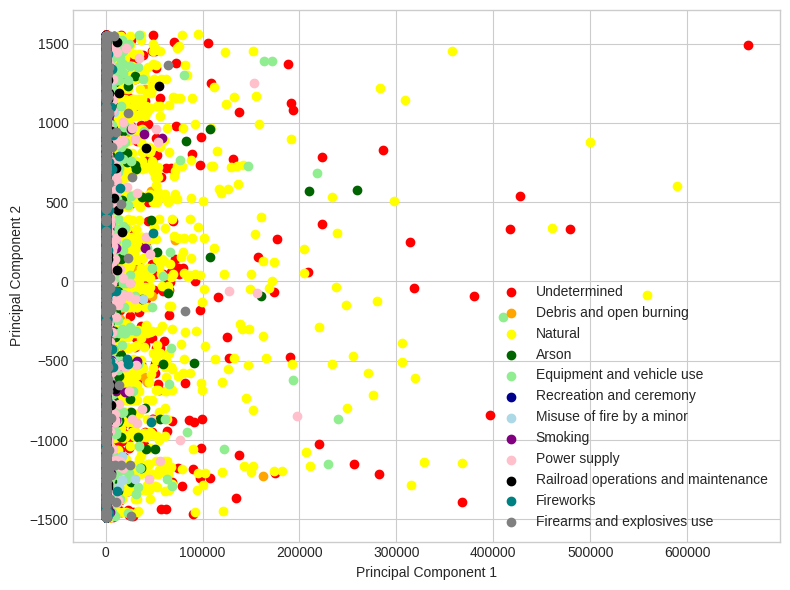

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(
        ('Undetermined', 'Debris and open burning', 'Natural', 'Arson',
         'Equipment and vehicle use', 'Recreation and ceremony ', 'Misuse of fire by a minor',
         'Smoking', 'Power supply', 'Railroad operations and maintenance',
         'Fireworks', 'Firearms and explosives use'),
        ('red', 'orange', 'yellow', 'darkgreen', 'lightgreen', 'darkblue',
         'lightblue', 'purple', 'pink', 'black', 'teal', 'grey', 'darkpurple')
    ):
        plt.scatter(
            pca_components[y2==lab, 0],
            pca_components[y2==lab, 1],
            label=lab,
            c=col
        )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [ ]:
pca.components_[0]

array([ 1.17869447e-05,  9.99978588e-01,  3.20393469e-04,  7.93202991e-06,
       -5.65028916e-06,  6.17582533e-05,  7.70172551e-06,  6.52795305e-03,
        1.75626280e-07,  2.48201897e-04,  2.01674550e-04,  2.67061988e-08,
        2.62626779e-06, -4.97218222e-11,  3.24993641e-08,  6.76466425e-09,
        3.17011465e-07,  2.84623213e-06,  1.69749276e-08,  2.44836669e-07,
       -6.11322130e-06, -4.02219239e-09,  6.05886208e-08,  1.77668082e-06,
        3.82125227e-09,  8.45176838e-08,  5.59751419e-08,  2.02676119e-07,
       -1.09235962e-10,  2.47928497e-06, -1.15414201e-07,  1.59668501e-07,
       -3.44051515e-06, -1.44563254e-06,  1.84706009e-07, -6.24798872e-09])

In [ ]:
cols = X2.columns.to_list()

In [ ]:
PCA1 = pca.components_[0].tolist()

In [ ]:
pca_info = {}
for col in cols:
  for pca in PCA1:
    pca_info[col] = pca
    PCA1.remove(pca)

pca_info

{'FIRE_YEAR': 1.8470600906354054e-07,
 'FIRE_SIZE': -1.4456325389433896e-06,
 'DURATION': -6.2479887236330154e-09,
 'STATE': 1.776680815067052e-06,
 'PRECIPITATION': 6.764664251747167e-09,
 'TEMPERATURE': 1.5966850054220716e-07}

In [ ]:
pca_info = {cols[i]: '{:.10f}'.format(PCA1[i]) for i in range(len(cols))}

In [ ]:
pca_info

{'FIRE_YEAR': '0.0000117869',
 'FIRE_SIZE': '0.9999785881',
 'DURATION': '0.0003203935',
 'STATE': '0.0000079320',
 'PRECIPITATION': '-0.0000056503',
 'TEMPERATURE': '0.0000617583',
 'WIND_SPEED': '0.0000077017',
 'ELEVATION': '0.0065279530',
 'DAY_OF_WEEK': '0.0000001756',
 'DAY_OF_YEAR': '0.0002482019',
 'COUNTY_STATE': '0.0002016745',
 'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs': '0.0000000267',
 'NWCG_REPORTING_AGENCY = _Bureau of Land Management': '0.0000026263',
 'NWCG_REPORTING_AGENCY = _Bureau of Reclamation': '-0.0000000000',
 'NWCG_REPORTING_AGENCY = _Department of Defense': '0.0000000325',
 'NWCG_REPORTING_AGENCY = _Department of Energy': '0.0000000068',
 'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service': '0.0000003170',
 'NWCG_REPORTING_AGENCY = _Forest Service': '0.0000028462',
 'NWCG_REPORTING_AGENCY = _Interagency Organization': '0.0000000170',
 'NWCG_REPORTING_AGENCY = _National Park Service': '0.0000002448',
 'NWCG_REPORTING_AGENCY = _State, County, or Local